<a href="https://colab.research.google.com/github/Horax02/Artificial_Vision-Mitnicks/blob/main/SSD%20MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844490 sha256=654e669b0083c620f9ce3fd222e0eca8047e852aebbed4d6398d19be8b666120
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [ ]:
import urllib.request
import tarfile
import os
import cv2
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.protos import string_int_label_map_pb2
from google.protobuf import text_format

# Descargar y extraer el modelo preentrenado
model_url = 'http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz'
model_dir = '/content/Modelo'
model_filename = 'ssd_mobilenet_v2_coco_2018_03_29.tar.gz'

# Descargar el archivo del modelo
urllib.request.urlretrieve(model_url, os.path.join(model_dir, model_filename))

# Extraer el contenido del archivo
tar_file = tarfile.open(os.path.join(model_dir, model_filename))
tar_file.extractall(model_dir)
tar_file.close()

# Rutas a los archivos del modelo
model_name = 'ssd_mobilenet_v2_coco_2018_03_29'
model_path = os.path.join(model_dir, model_name, 'saved_model')

# Cargar el modelo preentrenado
model = tf.saved_model.load(model_path)

# Descargar el archivo de mapeo de etiquetas
label_map_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'
label_map_path = '/content/Modelo/label_map.pbtxt'

# Descargar el archivo del mapeo de etiquetas
urllib.request.urlretrieve(label_map_url, label_map_path)

# Cargar el archivo de mapeo de etiquetas
label_map = string_int_label_map_pb2.StringIntLabelMap()
with open(label_map_path, 'r') as f:
    text_format.Merge(f.read(), label_map)
categories = label_map.item

In [ ]:
# Crear una función de detección de objetos
def detect_objects(image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Inferencia del modelo
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)

    num_detections = int(output_dict['num_detections'])
    classes = output_dict['detection_classes'][0].numpy().astype(np.uint8)
    boxes = output_dict['detection_boxes'][0].numpy()
    scores = output_dict['detection_scores'][0].numpy()

    # Filtrar detecciones con puntuación alta
    min_score_thresh = 0.5
    valid_indices = np.where(scores > min_score_thresh)[0]
    boxes = boxes[valid_indices]
    classes = classes[valid_indices]
    scores = scores[valid_indices]

    # Mostrar resultados en la imagen
    for i in range(len(boxes)):
        ymin, xmin, ymax, xmax = boxes[i]
        class_id = int(classes[i])
        class_name = getattr(categories[class_id], 'name')
        score = scores[i]

        # Dibujar la caja delimitadora y el texto de la clase y puntuación
        height, width, _ = image.shape
        (left, right, top, bottom) = (int(xmin * width), int(xmax * width),
                                      int(ymin * height), int(ymax * height))
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, f'{class_name} ({score:.2f})', (left, top - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return image

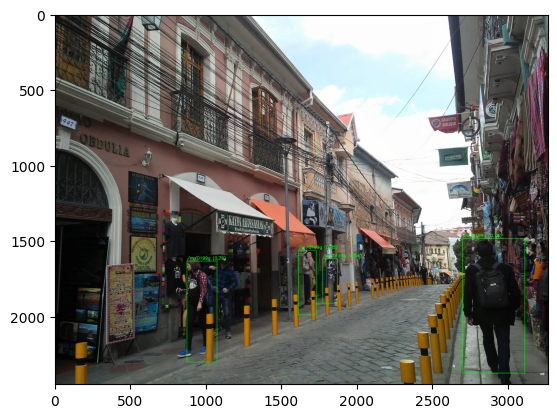

In [ ]:
from matplotlib import pyplot as plt
# Cargar la imagen de prueba
image = cv2.imread('/content/calle_bolivia_1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Realizar la detección de objetos en la imagen
output_image = detect_objects(image)
# Mostrar la imagen con los objetos detectados
plt.imshow(output_image)

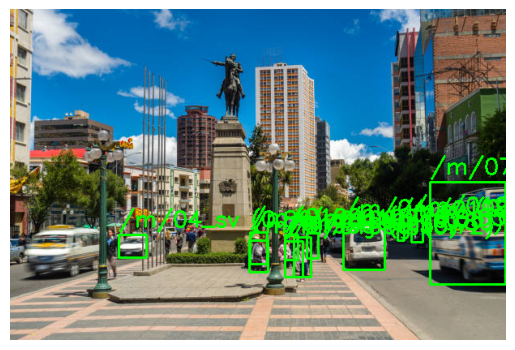

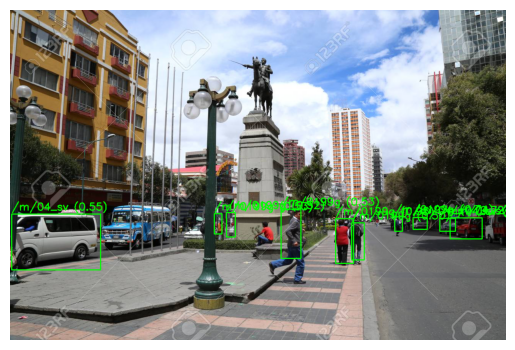

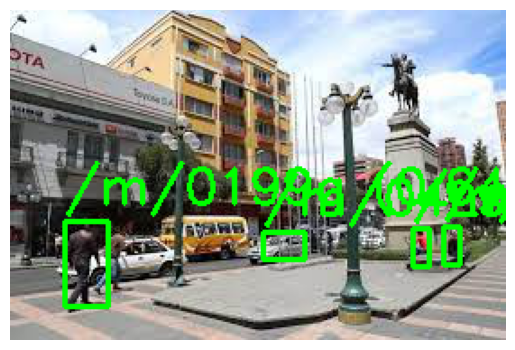

In [ ]:
import matplotlib.pyplot as plt
import urllib.request
import io

# URLs de las imágenes de calles
image_urls = [
    'https://media.istockphoto.com/id/1255348124/es/foto/gente-en-la-calle-en-el-centro-de-la-paz-algunos-con-un-vestido-tradicional-bolivia.jpg?s=612x612&w=0&k=20&c=aGwDhDjekliOpOS6HIVGSE4eJ1m0oxWiTP-kVcc98WI=',
    'https://previews.123rf.com/images/jjspring/jjspring1802/jjspring180200043/101775104-bolivia-la-paz-13-de-febrero-de-2017-paseo-de-la-calle-prado-y-monumento-a-sim%C3%B3n-bol%C3%ADvar-en-la.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIlHVX0qY2PLlOrKyI7E3VlQ3TEqa5_-khJn8gwbYoxt5_hHTqGVnWILLhv2kKPym0j6o&usqp=CAU'
]

def mostrar_imagenes(array_urls):
    for url in array_urls:
        try:
            # Descargar la imagen desde la URL
            response = urllib.request.urlopen(url)
            image_data = response.read()
            
            # Mostrar la imagen
            image = plt.imread(io.BytesIO(image_data), format='JPG')
            image = detect_objects(image)
            plt.imshow(image)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error al cargar la imagen desde la URL: {url}")
            print(str(e))

mostrar_imagenes(image_urls)